Foundations of Symbolic Calculus in Python
==========================================

The purpose of this lesson is to help students develop skills in performing symbolic calculus manipulations of scalar functions of single or multiple variables using the `algebra_with_sympy` library.

## Lesson Information
### Lesson Learning Objectives (LOs)
#### Cyberinfrastructure LOs
By the end of the lesson, students will be able to use the `algebra_with_sympy` library to...
- Perform symbolic derivatives of scalar functions of one or multiple variables
- Perform indefinite integration of scalar functions of one or multiple variables
- Perform definite integration of scalar functions of one or multiple variables

#### Content LOs
By the end of the lesson, students will be able to...
- Conceptually define partial differentiation of scalar functions as an extension of ordinary differentiation
- Determine the Taylor series representation of analytic scalar functions of a single variable
- Define "even" and "odd" scalar functions graphically and in terms of their Taylor series representations
- Determine if a scalar function of one variable is even or odd

### Lesson Prerequisites
#### Cyberinfrastructure Prereq's
- Basic familiarity with Python syntax (variable assignment, functions, control structures)
- Basic familiarity with performing symbolic algebra in Python with the `algebra_with_sympy` library

#### Content Prereq's
This lesson is focused on the development of the _cyberinfrastructure skills_ for performing symbolic calculus operations on real-valued scalar functions in Python rather than teaching the calculus itself. Students are therefore expected to be able to perform by hand the following operations from single-variable calculus:
- Limits of scalar functions of a single variable
- Ordinary derivatives of scalar functions of a single variable
- Indefinite integrals of scalar functions of a single variable
- Definite integrals of scalar functions of a single varialbe

Because this lesson is developed with a student in a science course as the intended audience, however, some brief conceptual reminders of the behavior of these operations are provided to bring students back up to speed.

:::{note} ℹ Multivariate Calculus
:icon:false
No familiarity with the calculus of scalar functions of multiple variables is assumed. Instead, these concepts are introduced as natural extensions of the calculus of scalar functions of a single variable.
:::

### Resources
- [MolSSI Workshop: Python Scripting for Computational Molecular Sciences](https://education.molssi.org/python_scripting_cms/)
- [MolSSI CMS Python Workshop: Introduction](https://education.molssi.org/python_scripting_cms/01-introduction/index.html)
- [Algebra with SymPy Documentation](https://gutow.github.io/Algebra_with_Sympy/algebra_with_sympy.html)
- [Demonstrations of `algebra_with_sympy` functionality with the `Equation` class](https://gutow.github.io/Algebra_with_Sympy/Demonstration%20of%20equation%20class.html)

### References
Portions of this lesson were adapted from
- [OpenStax Calculus Volume 1](https://openstax.org/details/books/calculus-volume-1) (abbreviated OSCv1 when referenced below)
- [OpenStax Calculus Volume 2](https://openstax.org/details/books/calculus-volume-2) (abbreviated OSCv2 when referenced below)

# Package Imports
:::{warning} ⚒ Importing necessary packages
:icon: false

Execute the cell below to ensure all necessary Python libraries are loaded.
:::

In [2]:
# EXECUTE: Import some packages that we will use later
from algebra_with_sympy import * # Automatically imports sympy
from sympy import plot as symplot # Graphically visualizing SymPy expressions
algwsym_config.output.solve_to_list = True # Makes automatic solution outputs a list for usability
#from math import log10
from sympy.codegen.cfunctions import log10 # Makes common logarithm available as log10()
print("This notebook is running Algebra_with_Sympy version " + str(algwsym_version)+".")

This notebook is running Algebra_with_Sympy version 1.1.3.


# Scalar Functions

Before we begin our exploration of the symbolic calculus of real scalar-valued functions in Python, let's first briefly familiarize ourselves with the behavior of these functions themselves.

:::{note} ℹ Basic Working Definitions
:icon:false
- A _real number_ is any numerical value that can be measured, i.e., that is not _imaginary_ (related to $\sqrt{-1}$)
    > Examples: $5$, $\pi$, $5.32$
- A _real scalar variable_ is a variable whose value is only a real number, without an accompanying direction. 
    > Examples: $x = 5$, $y = \pi$, $z = 5.32$
- A _scalar function_ $f(x,\ y,\ z,\ \ldots)$ is a function mapping one or more scalar input variables $x,\ y,\ z,\ \ldots$ as input to a single scalar output value $c$
    > Examples: $f(x) = 5x - 3$, $g(x,\ y) = \sin{x}\cos{y}$
- A _real-valued scalar function_ is a scalar function taking only real scalar variables as inputs and producing a real scalar value as output.
:::

By default, SymPy assumes that every variable you declare is a _complex number_ (with an _imaginary_ part) which behave differently than real scalar variables. While complex numbers are useful throughout physics and chemistry, we are restricting our focus in this lesson to only considering real-valued scalar functions. Because real and complex numbers behave differently, it is imperative that we tell SymPy that are variables are real only when we declare them!

:::{tip} 🐍 Declaring a Real Scalar Variable in SymPy
:icon: false
```python
var('x', real=True)
```
:::

By adding the new `real=True` input to the `var()` function, we have explicitly told SymPy that $x$ _must_ be a real number. In general, we will refer to this as the _scope_ of the math variable, which we will explore further in a subsequent lesson.

:::{warning} ⚒ Your Turn
:icon: false
In the cell below, declare real scalar math variables $x$, $y$, and $z$ to SymPy that we will use throughout the lesson.
:::

In [2]:
# YOUR TURN: Declare real scalar variables x, y, & z
var('x y z', real=True)

(x, y, z)

Now that we have declared our real scalar variables $x,\ y,\ \&\ z$, how do we declare and use real-valued scalar functions? Fortunately, it's exactly like defining an algebraic expression in SymPy! 

:::{tip} 🐍 Defining & Using a Scalar Function in SymPy
:icon: false
To define a scalar function of a single real variable in SymPy, use a Python assignment statement to assign an algebraic SymPy expression to a Python variable. For example, the linear function
$$f(x) = 5x - 3$$
can be declared by
```python
var('x', real=True)
f = 5*x - 3
```
To call the function $f(x)$ and evaluate it for a particular value of $x$ (e.g., $x = 5$), use the `Equation.subs()` method to substitute the value in for $x$:
* Input:
    ```python
    f.subs({x: 5})
    ```
* Output:
    $22$
:::

## Student Exercise 1: Predict & Test Scalar Function Output
:::{warning} 📝 Outputs of Scalar Functions
:icon:false
For each of the variables, scalar functions, and real numbers tabulated below,
1. Insert a new code cell to hold your work, and place a comment on the first line with the question part
2. Declare the variable with appropriate scope
3. Define the function of interest
4. Evaluate the function to a floating point (decimal) output at the given input value for the variable

| Question Part | Variable         | Variable Scope | Scalar Function            | Input Value              |
|:--------------|:-----------------|:---------------|:---------------------------|:-------------------------|
| (a)           | $x$              | Real           | $f(x) = x^3 - 3x + 15$     | $x = 4.5$                |
| (b)           | $\theta$ (theta) | Real           | $g(\theta) = \sin{\theta}$ | $\theta = \frac{\pi}{2}$ |
| (c)           | $t$              | Real           | $h(t) = -4.9t^2$           | $t = 8$                  |

:::{note} 💡 Hints
:icon:false
1. Exponents in Python
    >Remember, to raise a variable to a power in Python you use the `**` operation, so`x**2` would produce $x^2$.
2. Float vs. Symbolic Evaluation
    >SymPy will by default keep irrational numbers (e.g., $\pi$) as exact symbols in the output of `Equation.subs({...})`. To return a float value, make sure to call `Equation.subs({...}).evalf()`.
::::::

In [3]:
# (a)
var('x', real=True)
f = x**3 - 3*x + 15
f.subs({x: 4.5})

92.6250000000000

In [4]:
# (b)
var('theta', real=True)
g = sin(theta)
g.subs({theta: pi/2}).evalf()

1.00000000000000

In [42]:
# (c)
var('t', real=True)
h = -4.9*t**2
h.subs({t: 8})

-313.600000000000

## Visualizing Scalar Functions with SymPy

It is often useful not just to be able to _evaluate_ a scalar function at a point but also to visualize it graphically. To leverage SymPy's native plotting infrastructure to do this, we must first import the function, which we have already done in the cell executed in the [Package Imports](#package-imports) section with the line
```python
from sympy import plot as symplot # Graphically visualizing SymPy expressions
```
While it is not expressly necessary to give the function the `symplot` "alias," it is good practice to set descriptive function and variable names so that the user (you!) knows specifically what they're using.

:::{tip} 🐍 Visualizing a SymPy `Equation`
:icon: false
After the SymPy plot function has been imported as `symplot`, a SymPy `Equation` can be plotted by
```python
symplot(Equation)
```
Further functionality can be found in the [SymPy Documentation 🔗](https://docs.sympy.org/latest/modules/plotting.html#sympy.plotting.plot.plot).
:::

:::{warning} ⚒ Your Turn
:icon: false
In a separate cell for each function, plot $f(x)$, $g(\theta)$, and $h(t)$ that you defined in the exercise above.
:::

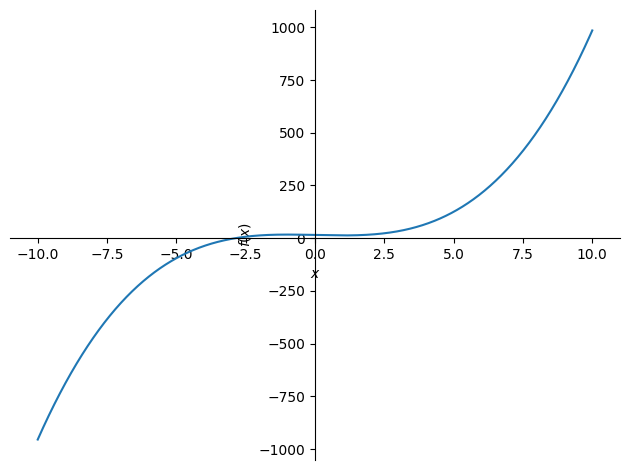

In [16]:
symplot(f)

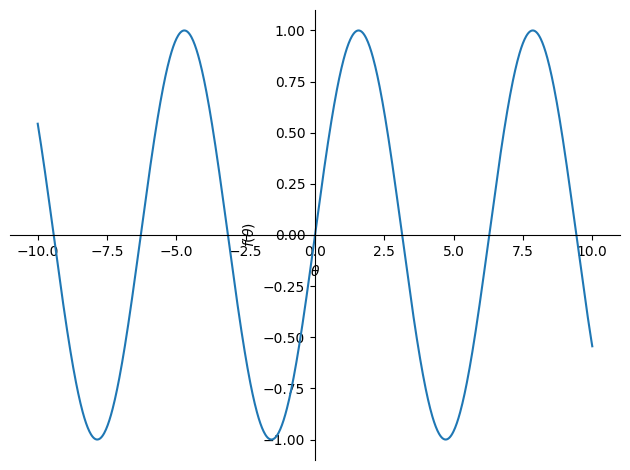

In [17]:
symplot(g)

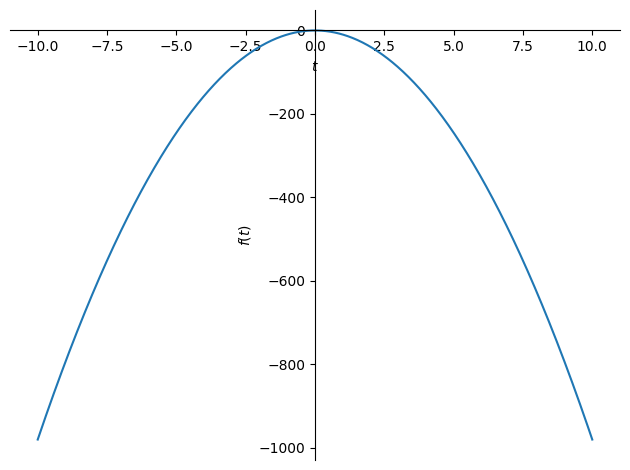

In [18]:
symplot(h)

# Calculus of Real-Valued Scalar Functions of a Single Variable

Now that we can declare and manipulate scalar real-valued functions of a single variable, let's explore how to perform standard calculus operations on these functions. 

## Limits
### Limits of Continuous Functions
The limit $L$ of a scalar function $f(x)$ as $x$ becomes arbitrarily close to some value $a$, represented mathematically as
$$\lim_{x\to a} f(x) = L,$$
can be evaluated symbolically in Python using the `limit()` function.

:::{tip} 🐍 Limits in SymPy
:icon: false
To evaluate the limit
$$\lim_{x\to a} f(x) = L,$$
use the SymPy `limit()` function:
```python
var('v', real=True) # Declare arbitrary real variable v
f =                 # Define the function f(v) here
limit(f, v, a)      # Directly substitute the value for a in here!
```
:::

:::{warning} ⚒ Your Turn
:icon: false
Evaluate the limit of the function $f(x) = x^3 - 3x + 15$ (that you defined above when solving SE1) as $x$ approaches the following values:
- $x\to 4.5$
- $x\to 0$
- $x\to -3.1$
:::{warning} 🧐 Student Reflection
:icon:false
How do the values of these limits compare with directly substituting the limiting value of $x$ into the function itself?
::::::

In [6]:
# Your Turn: Evaluate the limit of f(x) as x -> 4.5
limit(f,x,4.5)

92.6250000000000

In [24]:
# Your Turn: Evaluate the limit of f(x) as x -> 0
limit(f,x,0)

15

In [73]:
# Your Turn: Evaluate the limit of f(x) as x -> -3.1
limit(f,x,-3.1)

-5.49100000000000

### Limits of Non-Continuous Functions

Certain functions are not "continuous" for some finite (or even infinite) number of possible input values (see [OSCv1 Section 2.4](https://openstax.org/books/calculus-volume-1/pages/2-4-continuity) for a formal discussion). Three possible types of discontinuities are visualized in [](#fig-discontinuity-types) below:
:::{figure} attachment:6ae3de69-bcc5-4efe-a150-b9fc0685da96.png
:label:fig-discontinuity-types
:alt:Graphical depiction of the three types of discontinuities of a scalar function of a single variable. Left, label (a): a removable discontinuity; center, labeled (b): a jump discontinuity; right, labeled (c): an infinite discontinuity for which the left and right directional limits do not agree.
:align:center:
Graphical depiction of the three types of discontinuities of a scalar function of a single variable. (a) a removable discontinuity whose limit exists; (b) a jump discontinuity whose left and right directional limits are not equal; (c) an infinite jump discontinuity for which the left and right directional limits are not equal. (Image source: [OSCv1 Section 2.4](https://openstax.org/books/calculus-volume-1/pages/2-4-continuity))
:::

The value of a limit at these discontinuities depend on the type of discontinuity: 
* For a removable discontinuity (e.g., [](#fig-discontinuity-types).a), the limit exists and the value of the limit is what the value of the function "should" be if the discontinuity simply weren't there. 
* For a jump discontinuity (e.g., [](#fig-discontinuity-types).b & c), the limit does not exist, and we can only consider the limit as the function approaches the discontinuity from a certain direction (either from the left or right)
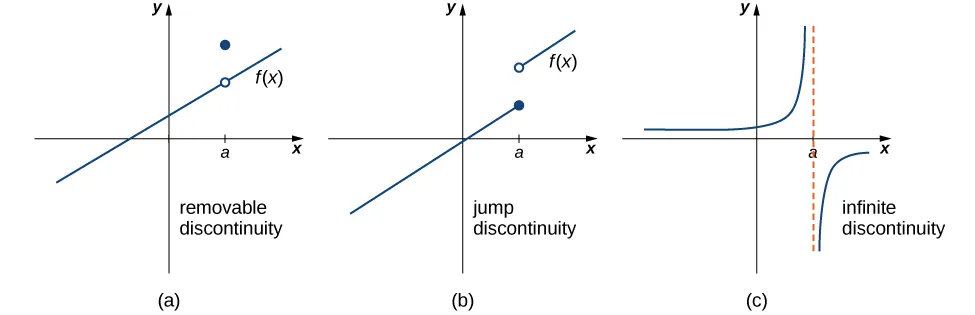

When the limit at a jump discontinuity (either finite or infinite) does not exist, we can instead speak about the _directional limit_ from either the left or the right:
| Direction      | Mathematical Notation    | SymPy Code         |
|:---------------|:-------------------------|:-------------------|
| From the Left  | $$\lim_{x\to a^-} f(x)$$ | `limit(f,x,a,'-')` |
| From the Right | $$\lim_{x\to a^+} f(x)$$ | `limit(f,x,a,'+')` |

:::{warning} ⚒ Your Turn
:icon: false
To see how to perform the directional limit of a scalar function at a discontinuity using SymPy, 
1. Define the real-valued function
$$m(x) = \frac{1}{x - 5}$$
2. Visualize $m(x)$ with `symplot()`
3. Predict the values of the left- and right-hand directional limits at the discontinuity $x=5$
4. Evaluate the left- and right-hand directional limits at $x=5$
5. Did your expectations match the directional limits evaluated by SymPy?
:::

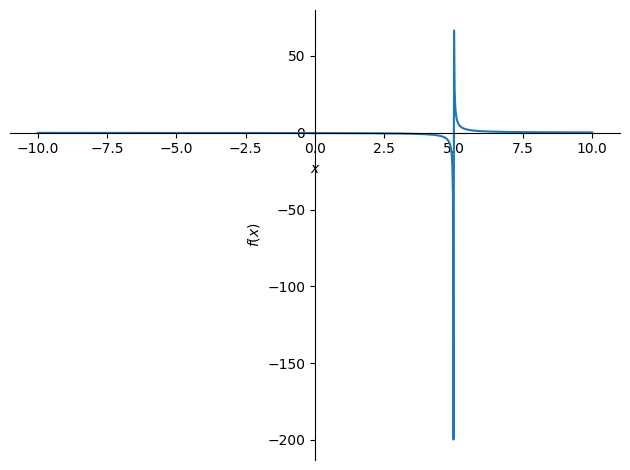

In [20]:
# YOUR TURN: Directional Limits of m(x) = 1/(x-5) at x=5
## Declare variable x and define function m(x)
var('x', real=True)
m = 1/(x-5)
## Plot m(x)
plot(m)

In [21]:
# YOUR TURN: Left-Hand Limit of m(x) @ x->5
limit(m,x,5,'-')

-oo

In [22]:
# YOUR TURN: Left-Hand Limit of m(x) @ x->5
limit(m,x,5,'+')

oo

### Student Exercise 2: "Proper" vs Directional Limits
:::{warning} 📝 Student Exercise
:icon: false
Consider the function
$$n(x) = \frac{1}{\left\vert x-5\right\vert}$$
For each of the following questions, first (a) predict the behavior of $n(x)$ and then (b) test your predictions with SymPy to verify your understanding of limits. To record your predictions and the results of your tests, double-click this cell and record your results in the table below!

1. What is the value of the left-hand limit of $n(x)$ as $x^-\to 5$?
2. What is the value of the right-hand limit of $n(x)$ as $x^+\to 5$?
3. Do the left- and right-hand directional limits have the same value?
4. Does the "proper" (i.e., non-directional) limit of $n(x)$ _exist_ as $x\to 5$?
:::{tip} 👀 Tips
:icon:false
1. Remember, the absolute value function in both Python and SymPy is `abs()`
2. To test whether two SymPy expressions, (e.g., `expr1` & `expr2`) are mathematically equal in value, you can use
    ```python
    expr1.equals(expr2) # Will return True if they're equal and False if they're not
    ```
::::::

| Exercise Part                                | Student Prediction           | SymPy Result                  |
|:---------------------------------------------|:-----------------------------|:------------------------------|
| 1. $$\lim_{x^-\to 5} n(x)$$                  | > Type your prediction here! | > Type the SymPy result here! |
| 2. $$\lim_{x^+\to 5} n(x)$$                  | > Type your prediction here! | > Type the SymPy result here! |
| 3. Do left & right directional limits match? | > Type your prediction here! | > Type the SymPy result here! |
| 4. Does $$\lim_{x\to 5} n(x)$$ exist?        | > Type your prediction here! | > Type the SymPy result here! |

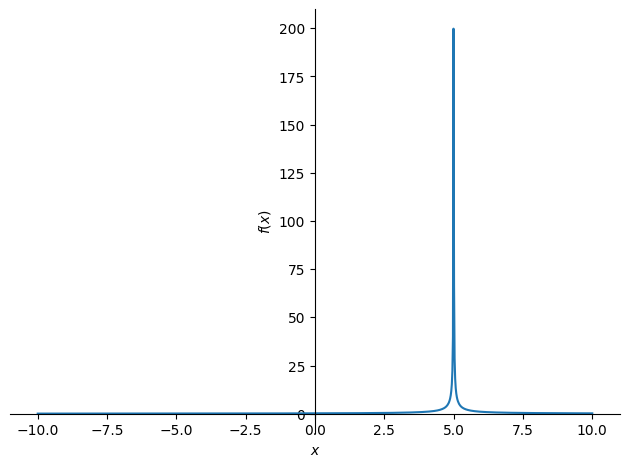

In [23]:
# SE2 Setup: Define n(x), plot if desired
var('x', real=True)
n = 1/abs(x-5)
symplot(n)

In [24]:
# SE2 Part 1: Left-hand limit of n(x)
limit(n,x,5,'-')

oo

In [25]:
# SE2 Part 2: Right-hand limit of n(x)
limit(n,x,5,'-')

oo

In [27]:
# SE2 Part 3: Do the directional limits match?
## Tip: Use limit(left).equals(limit(right)) to test for mathematical equality!
limit(n,x,5,'-').equals(limit(n,x,5,'-'))

True

### Student Reflection: Behavior of SymPy `limit` at Jump Discontinuities
:::{warning} 🧐 Student Reflection
:icon: false
Consider the behavior of the _proper_ (non-directional) limits of the functions $m(x)$ and $n(x)$ as $x\to 5$. 
1. What do you expect the behavior of SymPy to be when evaluating them with `limit()`, without specifying any direction of approach?
2. Does the behavior of SymPy `limit()` function agree with your mathematical understanding of the limit?
3. Based on your response to the question above, recommend a set of steps to one of your peers for computing the limit of a general function $f(x)$ at some point $a$ that will return the _mathematically expected result_.
:::

In [29]:
# Scratch space for reflection
limit(m,x,5)

oo

Double-click this cell & type your reflection below!
1. _Type your reflection here!_
2. _Type your reflection here!_
3. _Type your reflection here!_

### "Improper" Limits at Infinity

Very commonly, it is desirable to determine the behavior of a scalar function $f(x)$ as $x$ becomes either very large ($x\to\pm\infty$) or very small ($x\to O$). Determining the limiting behavior of $f(x)$ as $x$ becomes small in magnitude is typically a simple case of evaluating the limit of the function as $x\to 0$, however limits of scalar functions taken as their argument becomes infinitely large (also referred to as the function's _end behavior_) are more mathematically complicated (see, e.g., [OSCv1 section 4.6 🔗](https://openstax.org/books/calculus-volume-1/pages/4-6-limits-at-infinity-and-asymptotes) for a more thorough discussion). For the purposes of this lesson, we will say that
$$\lim_{x\to\pm\infty} f(x) = c$$
if as $x$ becomes sufficiently large in magnitude (either positive or negative), that $f(x)$ becomes close to $c$. While long-hand determination of a function's end behavior can be challenging, doing so with SymPy is just as straightforward as doing so for a typical limit.

:::{tip} 🐍 Determining the End Behavior of a Function in SymPy
:icon: false
The end behavior of a function $f(x)$ in SymPy can be determined by
```python
limit(f, x, oo)     # Limit as x approaches positive infinity
limit(f, x, -oo)    # Limit as x approaches negative infinity
```
:::{note} 👀 Tip: Representing Infinity in SymPy
:icon:false
To represent infinity ($\infty$) in SymPy, use the symbol `oo` (two lower-case letter "o"s).
::::::

:::{warning} ⚒ Your Turn
:icon: false
Use SymPy to determine the end behavior of the function
$$k(x) = \frac{5\sin{x}}{x}$$
as $x\to\infty$.
:::

In [33]:
# YOUR TURN: End behavior of k(x)
k = (5* sin(x)) / x
limit(k, x, oo)

0

## Derivatives

### Evaluating Derivatives of a Scalar Function

For a scalar function of a single variable $f(x)$, the _derivative_ of the function, denoted $f'(x)$, is a function relating the input variable to the _slope of a line tangent to the original function $f(x)$_. 
$$f'(x) = \frac{d}{dx} f(x)$$
While there are several "rules" for how to take the derivative of a function (rather than using the formal limit definition), every derivative can be evaluated symbolically with the following syntax:

:::{tip} 🐍 Evaluating the Derivative of a Function
:icon: false
```python
var('x', real=True) # Variable declaration
f =                 # Function definition placed here
d = diff(f, x)      # Evaluate the derivative of the function f with respect to th variable x
```
:::

:::{warning} ⚒ Your Turn
:icon: false
Evaluate the derivatives of the functions $f(x)$, $g(\theta)$, and $h(t)$ that you defined earlier, then double-check against the key in the "✅ Check Yo'Self" drop-down below.
:::

In [65]:
# Your Turn: Derivative of f(x) 
diff(f,x)

3*x**2 - 3

In [68]:
# Your Turn: Derivative of g(theta)
diff(g, theta)

cos(theta)

In [69]:
# Your Turn: Derivative of h(t)
diff(h, t)

-19.6*t

:::{warning} ✅ Check Yo'Self
:icon:false
:class:dropdown
:open:false
You should have gotten the following derivatives from SymPy:
| Function                   | Derivative                  |
|:---------------------------|:----------------------------|
| $f(x) = x^3 - 3x + 15$     | $f'(x) = 3x^2 - 3$          |
| $g(\theta) = \sin{\theta}$ | $g'(\theta) = \cos{\theta}$ |
| $h(t) = -9.8 t^2$          | $h'(t) = -19.6 t$           |
:::

Not only can we take the derivative using SymPy, we can also evaluate arbitrary-order ($n$th-order) derivatives, defined as repeatedly taking the first derivative $n$ times in sequence,
$$\frac{d^n}{dx^n} f = \frac{d}{dx}\left[\frac{d}{dx}\left[\frac{d}{dx}\left[\ldots\left[\frac{d}{dx} f\right]\right]\right]\right]$$
using exactly the same one-line Python syntax!

:::{tip} 🐍 Evaluating the $n$th Derivative of a Function
:icon: false
```python
var('x', real=True) # Variable declaration
f =                 # Function definition placed here
d = diff(f, x, n)   # Replace `n` with the desired order of the derivative to evaluate
```
:::

For example, the second derivative of $h(t)$, denoted $h''(t)$, is given by
$$h''(t) = \frac{d^2}{dx^2} h(t) = \frac{d}{dt}\left[\frac{d}{dt} h(t)\right] = \frac{d}{dt}\left[-19.6 t\right] = -19.6,$$
which we can evaluate with one line of Python as
```python
diff(h, t, 2)
```

:::{warning} ⚒ Your Turn
:icon: false
In the cell below, verify that the second derivative of $h(t)$ is indeed $h''(t) = -19.6$ by evaluating the second derivative with SymPy.
:::

In [72]:
# YOUR TURN: Verify that h''(t) = -19.6
diff(h,t,2)

-19.6000000000000

### Derivatives of Logarithmic and Exponential Functions

In physics and chemistry, two special classes of functions that are encountered particularly often are exponential functions and logarithmic functions. As it turns out, these two classes of functions are the _inverse_ of each other --- just like division can "undo" multiplication and visa versa, taking the logarithm and the exponential of a quantity are inverse operations that cancel each other out (provided they are operating with the same _base_). For example, when considering acid/base equilibria at the chemistry level, we defined the ${\rm pH}$ as the negative common logarithm (i.e., base-10) of the hydronium concentration:
$${\rm pH} = -\log_{10}{\left[{\rm H_3O^+}\right]}$$
which can be rearranged for $\left[{\rm H_3O^+}\right]$ by taking the inverse of the common logarithm of both sides of the expression:
$$10^{\rm -pH} = \left[{\rm H_3O^+}\right].$$
In the same way, the natural logarithm $\ln{x} = \log_{e}{x}$, whose base is the natural number $e$, has the exponential function $\exp{x}$ as its inverse. Before moving on to explore the calculus of logarithmic and exponential functions, recall that coding languages like Python represent logarithms in a different way than is typical in longhand mathematics:

:::{danger} ☢ Logarithms in Python
:icon:false
Unlike in a normal mathematical context, where "$\log$" is understood to represent the common logarithm and "$\ln$" is understood to mean the natural logarithm, Python and many other programming languages actually use `log` to mean the natural logarithm and `log10` to mean the common logarithm. 
| Logarithm Name    | Base | Typical Mathematical Notation | Python Function |
|-------------------|------|-------------------------------|-----------------|
| Common Logarithm  | 10   | $\log{x}$                     | `log10(x)`      |
| Natural Logarithm | $e$  | $\ln{x}$                      | `log(x)`        |
:::

Much like the derivatives of trigonometric functions (e.g., $\sin{x}$, $\cos{x}$, etc.), the derivatives of logarithmic and exponential functions have their own definitions different from the power rule for polynomials. 

#### Derivatives of Exponential Functions
:::{note} ℹ Derivatives of General Exponential Functions
:icon:false
For a general exponential function
$$f(x) = C\ b^{u(x)},$$
where $C$ is a constant (scalar) prefactor, $b$ is any real number (referred to as the _base_ of the exponential), and $u(x)$ is a real-valued scalar function of $x$, the derivative $f'(x)$ is defined as
$$f'(x) = \frac{d}{dx} C\ b^{u(x)} = C\ b^{u(x)}\ u'(x)\ \ln{b}$$
:::

This definition has the interesting consequence that the function $f(x) = e^x$ is unchanged by taking the derivative:
$$\frac{d}{dx} e^x = e^x\cdot\ln{e} = e^x$$
becuase $\ln{e} = 1$. 

#### Derivatives of Logarithmic Functions
:::{note} ℹ Derivatives of General Logarithmic Functions
:icon:false
For a general logarithmic function
$$f(x) = C\ \log_b{\left[ u(x)\right]}$$
where the prefactor $C$ is a real number, $b$ is any real number (referred to as the _base_ of the logarithm), and $u(x)$ is a real-valued scalar function of $x$, then for any value of $u(x)>0$, the derivative $f'(x)$ is defined as 
$$f'(x) = C\times\frac{u'(x)}{u(x)\ \ln{b}}$$
:::

For the natural logarithmic function $\ln{x}$ specifically, this definition means that
$$\frac{d}{dx}\ln{x} = \frac{1}{x\cdot\ln{e}} = \frac{1}{x}.$$

Fortunately, taking derivatives of logarithmic and exponential functions in SymPy is just as straightforward as any other function!

:::{warning} ⚒ Your Turn
:icon: false
In the cells below, evaluate the derivatvies of the following exponential & logarithmic functions, and verify your answers against the answers in the "✅ Check Yo'Self" drop-down key below.
1. $f(x) = e^{2x^2}$
2. $g(x) = \ln{\frac{x^2}{2x+1}}$
:::{tip} 👀 Tips
:icon:false
1. Particularly for exponential and logarithmic functions, it's critical to declare that your math variables are real numbers!
2. The exponential function $e^x$ is represented in SymPy as `exp(x)`
3. If your derivative looks way more complicated than the answer provided in the "✅ Check Yo'Self" drop-down key, try using the `Equation.simplify()` method to clean it up:
    ```python
    var('x', real=True)
    f =                # function definition goes here!
    fprime = diff(f,x) # evaluating the derivative
    fprime.simplify()  # Clean up the expression for the derivative to help compare to key
::::::

In [10]:
# YOUR TURN: f'(x)
var('x',real=True)
f = exp(2*x**2)
d = diff(f,x)
d

4*x*exp(2*x**2)

In [18]:
# YOUR TURN: g'(x)
var('x',real=True)
g = log((x**2) / (2*x + 1))
d = diff(g,x)
d.simplify()

2*(x + 1)/(x*(2*x + 1))

:::{warning} ✅ Check Yo'Self
:icon:false
:class:dropdown
:open:false
You should have gotten the following derivatives from SymPy:
| Function                       | Derivative                                                    |
|:-------------------------------|:--------------------------------------------------------------|
| $f(x) = e^{2x^2}$              | $f'(x) = 4 x e^{2 x^{2}}$                                     |
| $g(x) = \ln{\frac{x^2}{2x+1}}$ | $g'(x) = \frac{2 \left(x + 1\right)}{x \left(2 x + 1\right)}$ |
:::

### Scientific Applications of the Derivative

Calculus is not just a field of interest for its own sake, but also has wide applications throughout the physical and life sciences. To see this in the context of the operation of differentiation and the derivative of a function, let's explore a few of the derivative's most common applications in introductory science courses.

#### Derivatives Represent the Instantaneous Rate of Change in a Function

The derivative of a function $f(x)$, denoted $f'(x)$, gives the slope of the line tangent to the function $f(x)$ as a function of the independent variable $x$. This can be seen from the definition of the derivative of a function in terms of the limit:
$$ f'(a) = \lim_{h\to 0} \frac{f(a+h) - f(a)}{h},$$
which in plain language reads "as the point $x = a+h$ becomes infinitely close to the point $x = a$, the slope of the line intersecting the curve $f$ at these two values of $x$ becomes equal to the slope of the line tangent to the curve at $x=a$. Because the slope of a line intersecting the curve $f(x)$ at two points represents the average rate of change for the function over that interval, the slope of this _tangent line_ (i.e., the line intersecting the curve $f(x)$ _only_ at the point $x=a$) represents the _instantaneous_ rate of change in the function $f$ at that point. 

To see how this concept can be applied in the sciences, consider the function $h(t)$ that we defined earlier:
$$h(t) = -4.9 t^2$$
This function represents the height of a projectile launched vertically from the Earth's surface as a function of time. The derivative of this function, represents the instantaneous rate of change in the position of the projectile as a function of time --- in other words, the velocity of the projectile! Similarly, the second derivative represents the instantaneous rate of change of the velocity --- i.e., the projectile's acceleration!

:::{warning} ⚒ Your Turn
:icon: false
In the cell below, determine (a) the instantaneous velocity and (b) the instantaneous acceleration of a projectile launched upwards from the Earth's surface after 3 seconds of time have elapsed. Verify your answers against the answers in the "✅ Check Yo'Self" drop-down key below.
:::

In [41]:
# Your Turn: Determine instantaneous velocity & acceleration at t = 3 seconds 
## Declare time variable & height function
var('t', real=True)
h = -4.9*t**2

## Determine velocity function & instantaneous value @ t = 3 seconds
v = diff(h,t)
v_3s = v.subs({t:3})

## Determine acceleration function & instantaneous value @ t = 3 seconds
a = diff(h,t,2)
a_3s = a.subs({t:3})

print(f'Velocity at t=3 seconds: v = {v_3s} m/s')
print(f'Acceleration at t=3 seconds: a = {a_3s} m/s^2')

Velocity at t=3 seconds: v = -29.4000000000000 m/s
Acceleration at t=3 seconds: a = -9.80000000000000 m/s^2


:::{warning} ✅ Check Yo'Self
:icon:false
:class:dropdown
:open:false
You should have determined that $v(3) = -29.4\ {\rm m/s}$ and $a(3) = -9.8\ {\rm m/s^2}$.
:::

#### Estimating the Value of a Function from the Amount of Change Formula

In addition to the instantaneous rate of change in a function by way of the slope of the tangent line, the derivative can also be used to provide an estimate of a function's value in the neighborhood of a known value.  Looking back at the definition of the derivative,
$$f'(a) = \lim_{h\to 0} \frac{f(a+h) - f(a)}{h},$$
we can see that for sufficiently small values of $h$,
$$f'(a) \approx \frac{f(a+h) - f(a)}{h}$$
which can be solved for $f(a+h)$ to yield the so-called _amount of change_ formula:
$$f(a+h) \approx f(a) + h\cdot f'(a)$$


:::{figure} https://openstax.org/apps/image-cdn/v1/f=webp/apps/archive/20250522.165258/resources/ec6b5be01bbbe658b660d0f030bfb51722fc4b5b
:label:fig-amount-of-change-error
:alt:On the Cartesian coordinate plane with a and a + h marked on the x axis, the function f is graphed. It passes through (a, f(a)) and (a + h, f(a + h)). A straight line is drawn through (a, f(a)) with its slope being the derivative at that point. This straight line passes through (a + h, f(a) + f’(a)h). There is a line segment connecting (a + h, f(a + h)) and (a + h, f(a) + f’(a)h), and it is marked that this is the error in using f(a) + f’(a)h to estimate f(a + h).
:align:center:
Estimating the value of a function $f(x)$ in the neighborhood of a point $x=a$ using hte amount of change formula. (Image source: [OSCv1 Section 3.4](https://openstax.org/books/calculus-volume-1/pages/3-4-derivatives-as-rates-of-change))
:::

#### Ordinary Differential Equations

In [24]:
# YOUR TURN:
var('A B x', real=True)
y = A*sin(x) + B*cos(x)
ypp = diff(y,x,2)
(ypp + y).evalf()

0

## Integrals

Integration is an extremely important mathematical tool for describing a great deal of physical phenomena and their properties, so rather than a lengthy review of integral calculus, we will instead limit our discussion here to the business of _performing_ antiderivatives and _evaluating_ definite integrals. 

### Antiderivatives

:::{tip} 🐍 Performing the Antiderivative of a Univariate Scalar Function
The antiderivative $F(x)$ of a function $f(x)$ can be determined by evaluating the indefinite integral
$$F(x) = \int dx\ f(x),$$
which in Python syntax corresponds to
can be evaluated using SymPy as
:icon: false
```python
var('x', real=True)         # Variable declaration
f =                         # Function definition placed here
antideriv = integrate(f, x) # First argument: function name (or expression), second argument: variable of integration
```
:::{danger} ⚠️ Constants of Integration
:icon:false
For indefinite integrals, SymPy does not return an expression with a constant of integration!
::::::

:::{warning} ⚒ Your Turn
:icon: false
In the cell below, define the function $f(x) = x^2 - 3x + 5$, and evaluate its derivative $f'(x)$. Then, evaluate the antiderivative $F(x)$ of $f'(x)$.
:::

In [16]:
# YOUR TURN: Evaluate the antiderivative F(x) = integral(d/dx( x**2 - 3*x + 5))
var('x', real=True)
f = x**2 - 3*x + 5
fprime = diff(f,x)
antideriv = integrate(fprime, x)
antideriv

x**2 - 3*x

### Definite Integrals
:::{tip} 🐍 Evaluating the Definite Integral of a Univariate Scalar Function
:icon:false
The definite integral
$$\int_a^b dx\ f(x) = F(x)\bigg\vert_a^b = F(b) - F(a)$$
can be evaluated using SymPy as
```python
var('x a b', real=True) # Variable declaration: independent variable x, integration bounds a, b
f =                     # Function definition placed here
integrate(f, (x, a, b)) # Evaluates integral over interval [a, b] according to the Fundamental Theorem
```
:::

:::{warning} ⚒ Your Turn
:icon: false
In the cell below, define the function $f(x) = x^2 - 3x + 5$, and evaluate its definite integral over the bounds [-5, 5].
:::

In [15]:
# YOUR TURN: Evaluate the definite integral of x**2 - 3*x + 5 over [-5, 5]
var('x', real=True)
f = x**2 - 3*x + 5
integrate(f, (x, -5, 5))

400/3

# Calculus of Real-Valued Scalar Functions of Multiple Variables
For now, we will focus on how to perform the calculus of multivariate scalar functions using SymPy as a natural extension of the discussion above of the calculus of scalar univariate functions.

## Partial Derivatives of Scalar Multivariate Functions
:::{tip} 🐍 Evaluating the Partial Derivative of a Scalar Multivariate Function
:icon:false
For a scalar, real-valued function $f$ defined over real variables ${x_1, x_2, \ldots, x_N}$, the partial derivative
$$f_{x_i} = \frac{\partial f}{\partial x_i} = \frac{\partial}{\partial x_i} f$$
can be evaluated using SymPy as
```python
var('x_1 x_2 x_3', real=True) # Variable declarations
f =                           # Function definition placed here
fprime_xi = diff(f, x_1)      # Evaluates partial derivative w.r.t. x_1
```
:::


:::{warning} ⚒ Your Turn
:icon: false
In the cell below, define the ideal gas law in terms of pressure, then evaluate the partial derivative in terms of volume.
:::

In [17]:
# YOUR TURN: Partial derivative of ideal gas pressure w.r.t. volume
var('P V n R T', real=True, positive=True)
ideal_gas =@ P*V = n*R*T
ideal_P = (ideal_gas / V).rhs
P_V = diff(ideal_P, V)
P_V

-R*T*n/V**2